**Preprocessing 

Data from: https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime

1. Data Cleaning
- Dealing with data types e.g. making categorical data numeric i.e. dummy features
- Handling missing data (Imputing Na values instead of removing)

2. Data Exploration
- Detecting outliers (Tukey IQH or Kernal Density Estimation)
- Plotting Distributions. Log transformation of data that is skewed (very long tails) can impove accuracy.
- Smote. Balance dataset-to prevent the tree from being biased toward the classes that are dominant. Create an equal number of samples from each class by normalising the sum of the sample weights for each class to the same value.

3. Feature Enigineering
- Interactions between features
- Increasing dimensionality vs decreasing dimensionality


4. Feature Selection. Discard the least important variables to reduce noise. Good variables are often constructed using ratios, differences, averages of variables etc.


In [1]:
import pandas as pd
from sklearn import tree
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg


# Read data and assign NA to missing values 
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/00211/CommViolPredUnnormalizedData.txt',
                   sep='\s*,\s*',encoding='latin-1',engine='python', na_values=["?"])


data.columns = ['communityname','state','countyCode','communityCode','fold','population','householdsize','racepctblack',
           'racePctWhite','racePctAsian','racePctHisp','agePct12t21','agePct12t29','agePct16t24','agePct65up',
           'numbUrban','pctUrban','medIncome','pctWWage','pctWFarmSelf','pctWInvInc','pctWSocSec','pctWPubAsst',
           'pctWRetire','medFamInc','perCapInc','whitePerCap','blackPerCap','indianPerCap','AsianPerCap','OtherPerCap',
           'HispPerCap','NumUnderPov','PctPopUnderPov','PctLess9thGrade','PctNotHSGrad','PctBSorMore','PctUnemployed',
           'PctEmploy','PctEmplManu','PctEmplProfServ','PctOccupManu','PctOccupMgmtProf','MalePctDivorce',
           'MalePctNevMarr','FemalePctDiv','TotalPctDiv','PersPerFam','PctFam2Par','PctKids2Par','PctYoungKids2Par',
           'PctTeen2Par','PctWorkMomYoungKids','PctWorkMom','NumKidsBornNeverMar','PctKidsBornNeverMar','NumImmig',
           'PctImmigRecent','PctImmigRec5','PctImmigRec8','PctImmigRec10','PctRecentImmig','PctRecImmig5',
           'PctRecImmig8','PctRecImmig10','PctSpeakEnglOnly','PctNotSpeakEnglWell','PctLargHouseFam',
           'PctLargHouseOccup','PersPerOccupHous','PersPerOwnOccHous','PersPerRentOccHous','PctPersOwnOccup',
           'PctPersDenseHous','PctHousLess3BR','MedNumBR','HousVacant','PctHousOccup','PctHousOwnOcc','PctVacantBoarded',
           'PctVacMore6Mos','MedYrHousBuilt','PctHousNoPhone','PctWOFullPlumb','OwnOccLowQuart','OwnOccMedVal',
           'OwnOccHiQuart','OwnOccQrange','RentLowQ','RentMedian','RentHighQ','RentQrange','MedRent','MedRentPctHousInc',
           'MedOwnCostPctInc','MedOwnCostPctIncNoMtg','NumInShelters','NumStreet','PctForeignBorn','PctBornSameState',
           'PctSameHouse85','PctSameCity85','PctSameState85','LemasSwornFT','LemasSwFTPerPop','LemasSwFTFieldOps',
           'LemasSwFTFieldPerPop','LemasTotalReq','LemasTotReqPerPop','PolicReqPerOffic','PolicPerPop',
           'RacialMatchCommPol','PctPolicWhite','PctPolicBlack','PctPolicHisp','PctPolicAsian','PctPolicMinor',
           'OfficAssgnDrugUnits','NumKindsDrugsSeiz','PolicAveOTWorked','LandArea','PopDens','PctUsePubTrans',
           'PolicCars','PolicOperBudg','LemasPctPolicOnPatr','LemasGangUnitDeploy','LemasPctOfficDrugUn',
           'PolicBudgPerPop','murders','murdPerPop','rapes','rapesPerPop','robberies','robbbPerPop','assaults',
           'assaultPerPop','burglaries','burglPerPop','larcenies','larcPerPop','autoTheft','autoTheftPerPop','arsons',
           'arsonsPerPop','ViolentCrimesPerPop','nonViolPerPop']

# display first 5 columns of dataset
print(data.head(5))


      communityname state  countyCode  communityCode  fold  population  \
0    Marpletownship    PA        45.0        47616.0     1       23123   
1        Tigardcity    OR         NaN            NaN     1       29344   
2  Gloversvillecity    NY        35.0        29443.0     1       16656   
3       Bemidjicity    MN         7.0         5068.0     1       11245   
4   Springfieldcity    MO         NaN            NaN     1      140494   

   householdsize  racepctblack  racePctWhite  racePctAsian  ...  burglaries  \
0           2.82          0.80         95.57          3.44  ...        57.0   
1           2.43          0.74         94.33          3.43  ...       274.0   
2           2.40          1.70         97.35          0.50  ...       225.0   
3           2.76          0.53         89.16          1.17  ...        91.0   
4           2.45          2.51         95.65          0.90  ...      2094.0   

   burglPerPop  larcenies  larcPerPop  autoTheft  autoTheftPerPop  arsons  \
0  

In [2]:
# need to transform this outcome into 0 and 1's, 0 for low crime, 1 for high crime.
# choose a suitable threshold based, < 795 crimes is low crime, although this is subjective.
data['ViolentCrimesPerPop'] = [0 if a < 795 else 1 for a in data['ViolentCrimesPerPop']]



In [3]:
# Select the relevant columns to use in the model 
cols_final = data[['population',
 'racepctblack',
 'agePct12t29',
 'numbUrban',
 'medIncome',
 'pctWWage',
 'pctWInvInc',
 'medFamInc',
 'perCapInc',
 'whitePerCap',
 'PctEmploy',
 'MalePctDivorce',
 'MalePctNevMarr',
 'TotalPctDiv',
 'PctKids2Par',
 'PctWorkMom',
 'NumImmig',
 'PctRecImmig8',
 'PctRecImmig10',
 'PctLargHouseOccup',
 'PersPerOccupHous',
 'PersPerRentOccHous',
 'PctPersOwnOccup',
 'PctPersDenseHous',
 'HousVacant',
 'PctHousOwnOcc',
 'OwnOccLowQuart',
 'OwnOccMedVal',
 'RentLowQ',
 'RentMedian',
 'MedRent',
 'MedOwnCostPctIncNoMtg',
 'NumStreet',
 'ViolentCrimesPerPop']]
  
# look at data again
cols_final


,population,racepctblack,agePct12t29,numbUrban,medIncome,pctWWage,pctWInvInc,medFamInc,perCapInc,whitePerCap,...,HousVacant,PctHousOwnOcc,OwnOccLowQuart,OwnOccMedVal,RentLowQ,RentMedian,MedRent,MedOwnCostPctIncNoMtg,NumStreet,ViolentCrimesPerPop
0,23123,0.80,21.30,23123,47917,78.99,64.11,55323,20148,20191,...,240,84.88,136300,164200,467,560,627,12.5,0,0
1,29344,0.74,25.88,29344,35669,82.00,55.73,42112,16946,17103,...,544,57.79,74700,90400,370,428,484,11.6,0,0
2,16656,1.70,25.20,0,20580,68.15,38.95,26501,10810,10909,...,669,54.89,36400,49600,195,250,333,14.5,0,0
3,11245,0.53,40.53,0,17390,69.33,42.82,24018,8483,9009,...,333,53.57,30600,43200,202,283,332,12.9,0,1
4,140494,2.51,32.89,140494,21577,75.78,41.15,27705,11878,12029,...,5119,55.50,37700,53900,215,280,340,11.7,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2209,56216,6.87,30.16,56216,24727,75.05,31.42,27388,10237,13041,...,683,44.63,71200,91100,298,374,438,11.7,0,0
2210,12251,21.18,31.23,12251,20321,75.06,33.25,25000,9995,11353,...,523,54.24,33600,52000,176,248,330,14.4,0,0
2211,32824,0.52,20.96,32824,27182,59.79,44.72,34973,14131,14416,...,957,76.81,91700,123900,347,451,514,13.1,0,0
2212,13547,3.37,30.01,0,19899,71.67,21.94,22103,8100,9555,...,802,58.39,26000,37800,135,227,316,14.1,0,0


**Removing items with missing data**

Models can't handle missing data, so features with missing data should be removed. Removing data can cause issues if the data is randomly missing because it can cause the loss of a lot of data. However, greater issues arise from removing data if the data is randomly as well as non-randomly missing because this makes it no longer representative of the whole population and can introduce potential biases.

Imputation can be used to replace missing values with another value i.e. the mean, median or highest frequency of a given feature.

In [4]:
# Remove missing values
# First establish how much data is missing
cols_final.isnull().sum().sort_values(ascending=False).head()


# Impute the missing values using SimpleImputer in sklearn.impute
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(cols_final)
cols_final = pd.DataFrame(data=imp.transform(cols_final), columns=cols_final.columns)


# Check if there is still missing data
cols_final.isnull().sum().sort_values(ascending=False).head()

population            0
PctHousOwnOcc         0
PctLargHouseOccup     0
PersPerOccupHous      0
PersPerRentOccHous    0
dtype: int64

In [5]:
# Check if the dataset needs to be balanced
# is the number of 1s and 0s balanced in the outcome y column?
print(cols_final['ViolentCrimesPerPop'].value_counts())


# because it is not balanced, should balance it 
# get a random sample of each crime outcome (0 or 1) where sample size is equal to the size of a class with min number of instances.
# The x in the lambda ends up being a dataframe that is the subset of df represented by the group. Each of these dataframes, 
# one for each group, gets passed through this lambda.

# g = y.groupby('ViolentCrimesPerPop')
# g.apply(lambda y: y.sample(g.size().min()).reset_index(drop=True))


# Then need to split up the features and outcomes
# So x as a data frame of features and y as a series of the outcome variable
x = cols_final.drop('ViolentCrimesPerPop', 1) 
y = cols_final.ViolentCrimesPerPop


# this sets the numpy to print numbers with float precision (this setting affects only the prints not the actual values)
# np.set_printoptions(suppress=True)

#ys, xs = np.split(df.values, [1], axis=1)
#ys = ys.reshape(-1)


print('variables', x.head(5))
print('crime outcome', y.head(5))


0.0    1495
1.0     719
Name: ViolentCrimesPerPop, dtype: int64
variables    population  racepctblack  agePct12t29  numbUrban  medIncome  pctWWage  \
0     23123.0          0.80        21.30    23123.0    47917.0     78.99   
1     29344.0          0.74        25.88    29344.0    35669.0     82.00   
2     16656.0          1.70        25.20        0.0    20580.0     68.15   
3     11245.0          0.53        40.53        0.0    17390.0     69.33   
4    140494.0          2.51        32.89   140494.0    21577.0     75.78   

   pctWInvInc  medFamInc  perCapInc  whitePerCap  ...  PctPersDenseHous  \
0       64.11    55323.0    20148.0      20191.0  ...              1.01   
1       55.73    42112.0    16946.0      17103.0  ...              2.03   
2       38.95    26501.0    10810.0      10909.0  ...              1.21   
3       42.82    24018.0     8483.0       9009.0  ...              2.94   
4       41.15    27705.0    11878.0      12029.0  ...              2.11   

   HousVacant  Pct

**Data Cleaning**

If there are categorical columns in the dataset, transform these to numeric.

Decide which categorical variables to use in the model
Models can only handle numerical features, so dummy features are created to transform a categorical feature into a set of dummy features, each representing a unique category. In the set of dummy features, 1 indicates that the observation belongs in that category e.g. female would be 1, male 0.

Dummy features dont have to be used for ones with low frequencies, instead, buckets can be used to bucket low frequency categories as 'other'.

In [6]:
# use get_dummies in pandas to change categorical data to numerical
# print(pd.get_dummies(x['communityname']).head(5))

In [7]:
# Check how many unique categories there are 
# for col_name in x.columns:
   # if x[col_name].dtypes == 'object':
    #    unique_cat = len(x[col_name].unique())
     #   print("Feature '{col_name}' has {unique_cat} unique categories".format(
       #     col_name=col_name, unique_cat=unique_cat))

In [8]:
# select the features which are not numeric
# todummy_list = ['state', 'communityname']

# Dummy all categorical variables used. make them numeric and then missing values can be dealt with.
# def dummy_df(data, todummy_list):
   # for x in todummy_list:
        # dummies = pd.get_dummies(data[x], prefix=x, dummy_na=False)
       # data = data.drop(x, 1) # dropping the original feature
       # data = pd.concat([data, dummies], axis=1) # adding the one to be used
   # return data

# x = dummy_df(x, todummy_list)
# print(x.head(5))

**Outlier Detection**

An outlier = an observation that deviates drastically from other values in the dataset. Decision trees are robust to outliers because they isolate them in small regions of the feature space. Since the prediction for each leaf is the average (for regression), being isolated in seperate leaves, outliers won't influence the rest of the predictions/ impact the mean of the other leaves.

**Natural vs error:

Naturally occuring error, although not problematic, can skew the model by affecting the slope
Error is indicative of data quality issues, therefore it it not information that should be used in the model. Imputation can be used to deal with these erroneous values (the same way as dealing with missing data).
Methods of outlier detection include Kernel density estimation or Tukey IQR.

**Tukey IQR** Identifies extreme values in the data and is favourable to using standard deviation from the mean to detect outliers because Tukey doesn't make assumptions about normality and is less sensitive to extreme values.
(Interquartile ranges). To find most most extreme values, use a diff multiplier to 1.5.

Q1-1.5(Q3-Q1) or above Q3+1.5(Q3-Q1)

One limitation of Tukey IQR outlier detection is that it does not capture outliers in a bimodal distribution, but rather extreme values, like Kernal Density Estimation can.

In [9]:
# find outliers using Tukey IQR
def find_outliers_tukey(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3-q1 
    floor = q1 - 1.5*iqr # The floor = less than the first quartile minus the IQR.
    ceiling = q3 + 1.5*iqr # The ceiling = more than the third quartile plus the IQR.
    outlier_indices = list(x.index[(x < floor) | (x > ceiling)]) # If the value is below the floor, or above the ceiling, it is an outlier
    outlier_values = list(x[outlier_indices]) # indices to access these data points later

    return outlier_indices, outlier_values


# for example, check the outliers for ‘medIncome’
tukey_indices, tukey_values = find_outliers_tukey(x['medIncome'])
print(np.sort(tukey_values))

[ 68654.  68742.  69019.  69695.  69904.  69917.  70000.  70039.  70287.
  70919.  71274.  71905.  71996.  72369.  74124.  74401.  74472.  74825.
  75221.  75905.  76907.  77530.  78965.  79092.  79579.  79797.  80968.
  81957.  83275.  83975.  84441.  84498.  86674.  87686.  89395.  91951.
  95134. 100077. 101320. 110550. 118456. 123625.]


**Distribution of Features

Plotting frequency histograms to show the distribution of a given feature.

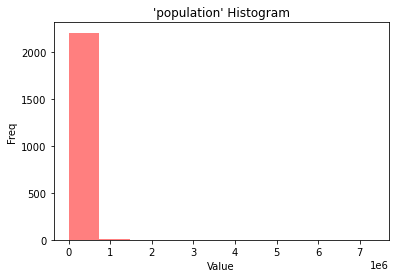

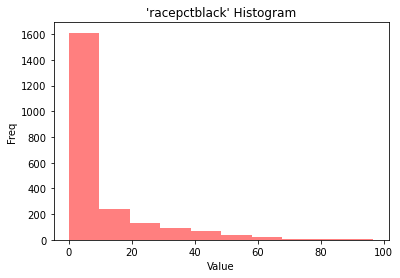

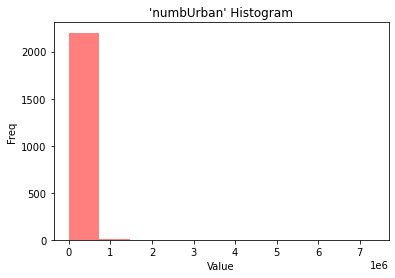

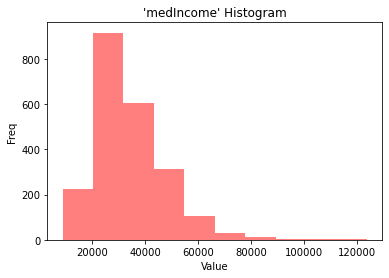

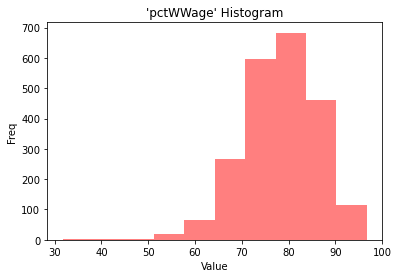

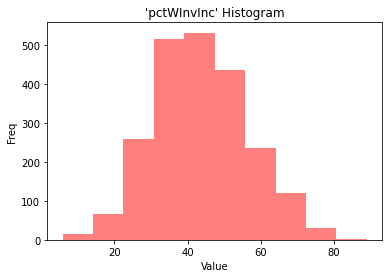

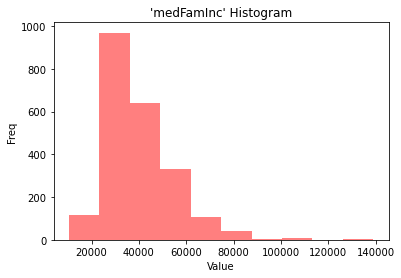

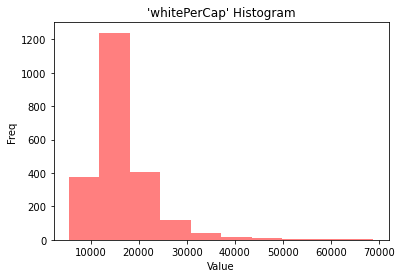

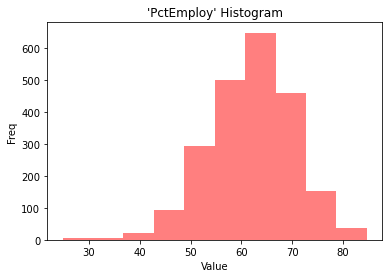

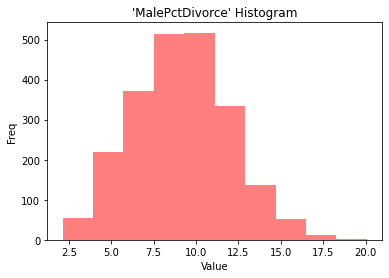

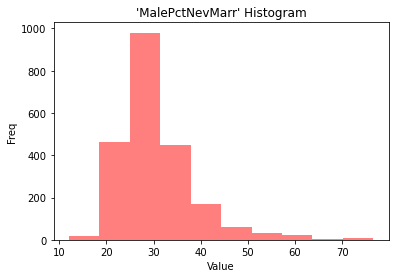

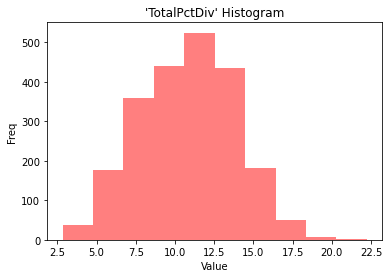

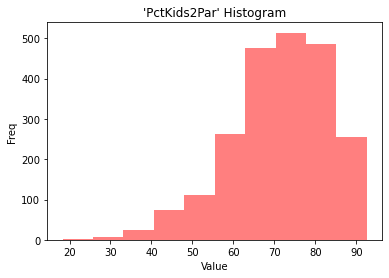

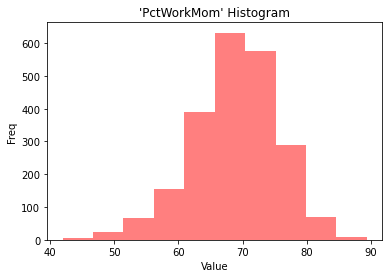

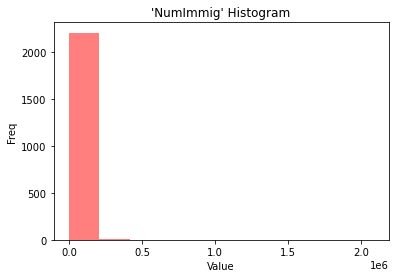

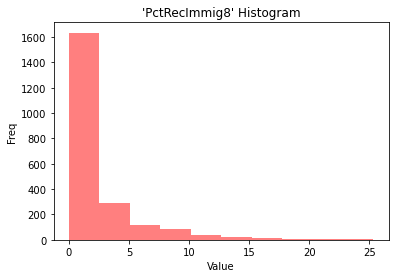

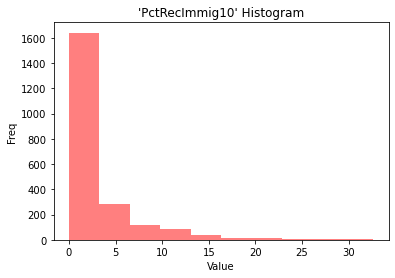

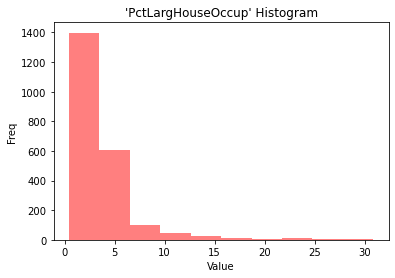

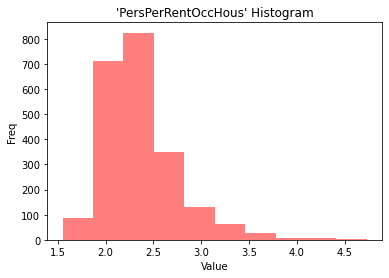

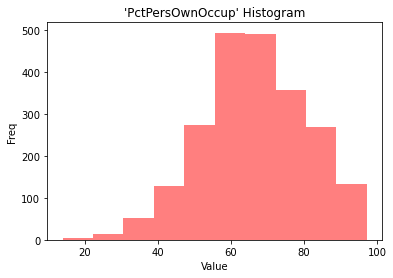

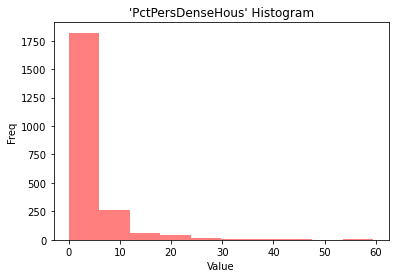

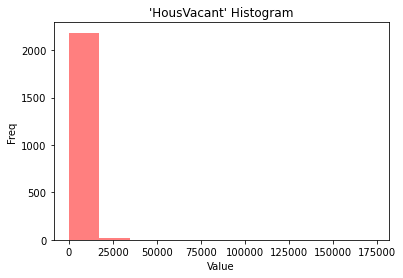

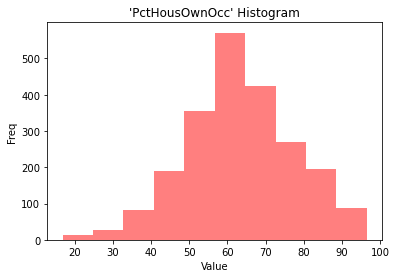

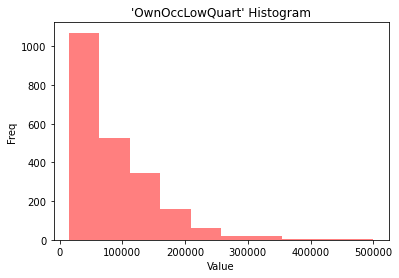

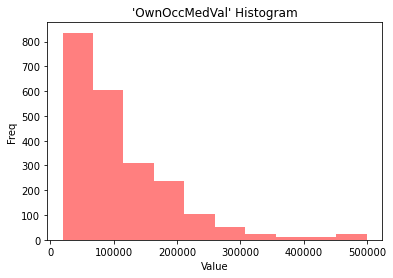

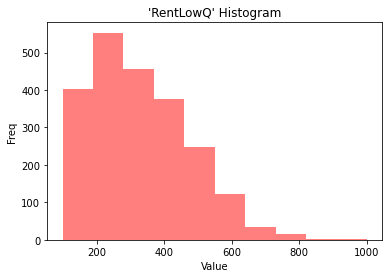

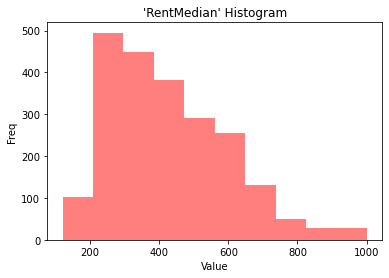

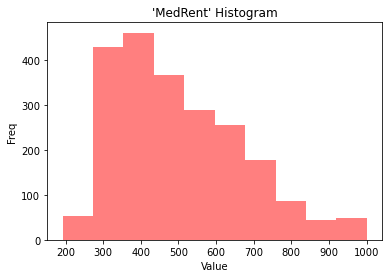

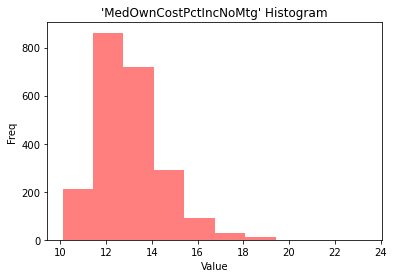

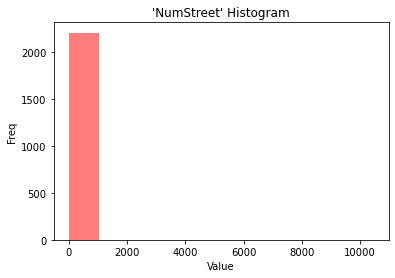

In [10]:
# plot histograms using peplos in marplotlib
%matplotlib inline
import matplotlib.pyplot as plt

def histo_plot(x):
    plt.hist(x,color='red', alpha=0.5)
    plt.title("'{var_name}' Histogram".format(var_name=x.name))
    plt.ylabel("Freq")
    plt.xlabel("Value")
    plt.show()
    
# plot histograms to show the distributions of given features
histo_plot(x['population'])
histo_plot(x['racepctblack'])
histo_plot(x['numbUrban'])
histo_plot(x['medIncome'])
histo_plot(x['pctWWage'])
histo_plot(x['pctWInvInc'])
histo_plot(x['medFamInc'])
histo_plot(x['whitePerCap'])
histo_plot(x['PctEmploy'])
histo_plot(x['MalePctDivorce'])
histo_plot(x['MalePctNevMarr'])
histo_plot(x['TotalPctDiv'])
histo_plot(x['PctKids2Par'])
histo_plot(x['PctWorkMom'])
histo_plot(x['NumImmig'])
histo_plot(x['PctRecImmig8'])
histo_plot(x['PctRecImmig10'])
histo_plot(x['PctLargHouseOccup'])
histo_plot(x['PersPerRentOccHous'])
histo_plot(x['PctPersOwnOccup'])
histo_plot(x['PctPersDenseHous'])
histo_plot(x['HousVacant'])
histo_plot(x['PctHousOwnOcc'])
histo_plot(x['OwnOccLowQuart'])
histo_plot(x['OwnOccMedVal'])
histo_plot(x['RentLowQ'])
histo_plot(x['RentMedian'])
histo_plot(x['MedRent'])
histo_plot(x['MedOwnCostPctIncNoMtg'])
histo_plot(x['NumStreet'])

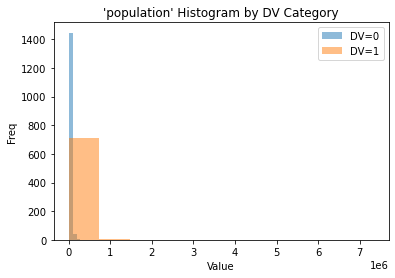

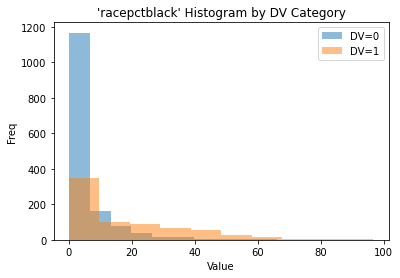

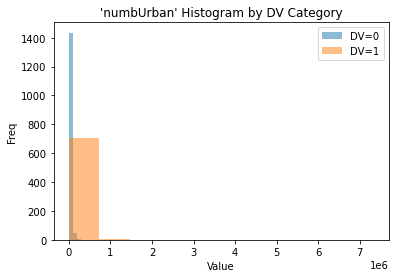

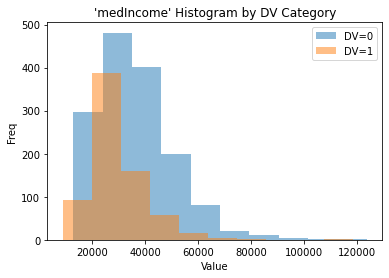

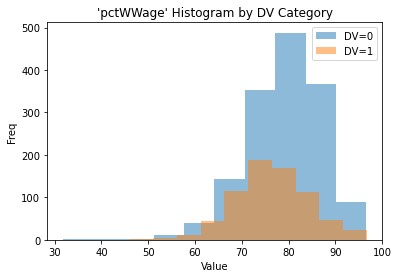

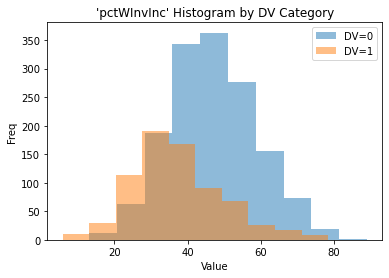

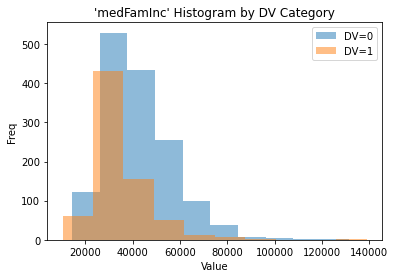

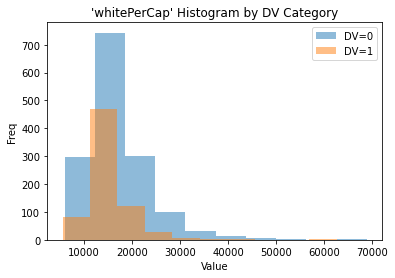

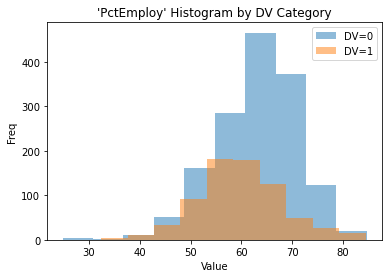

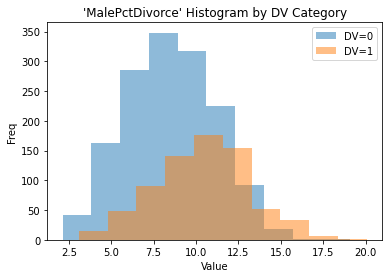

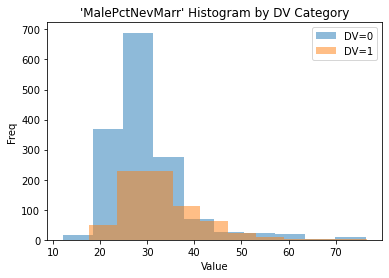

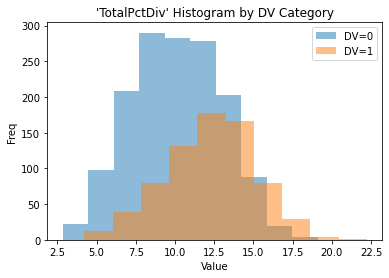

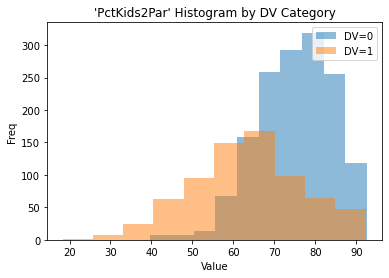

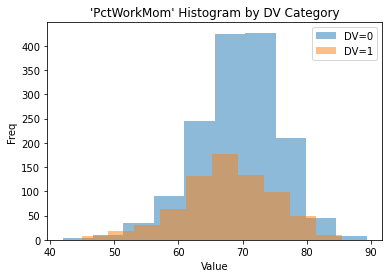

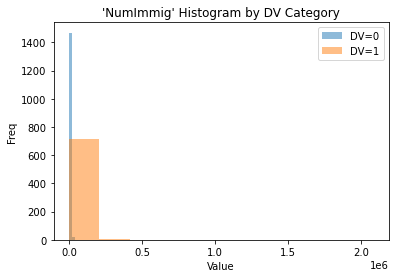

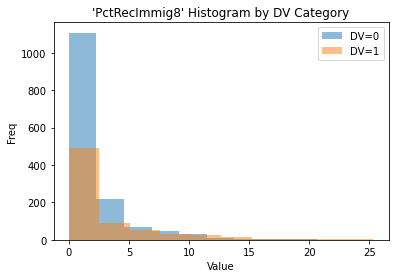

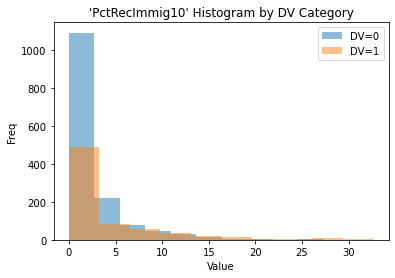

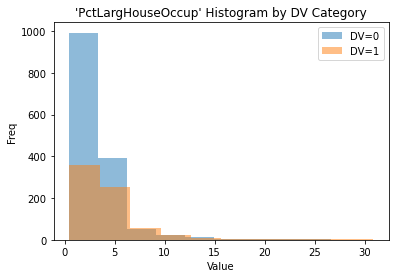

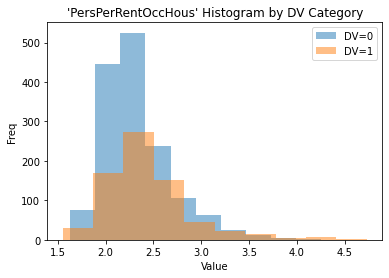

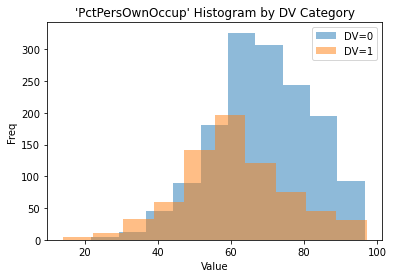

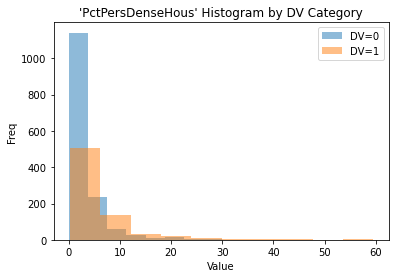

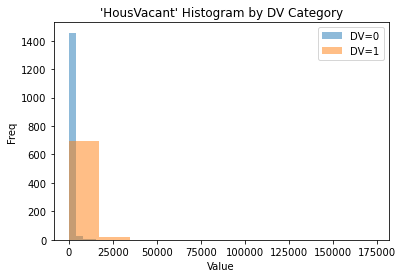

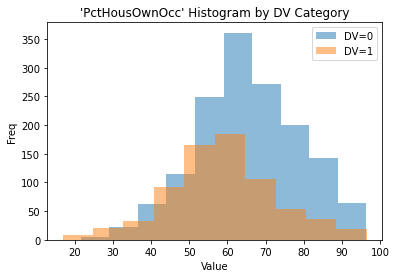

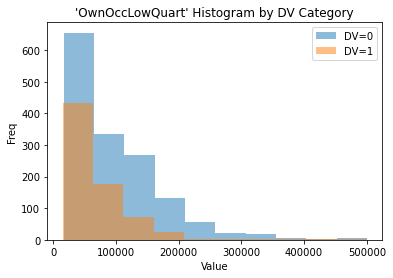

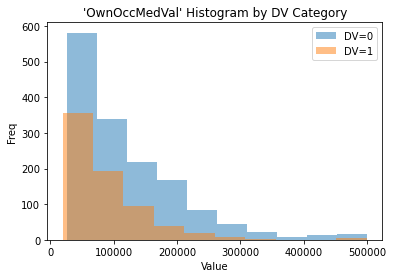

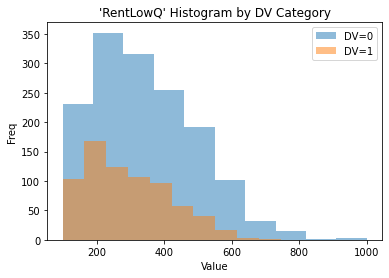

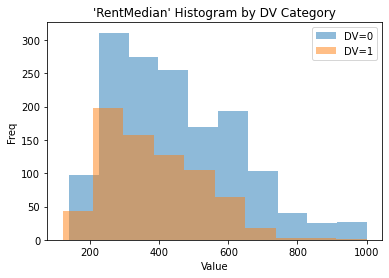

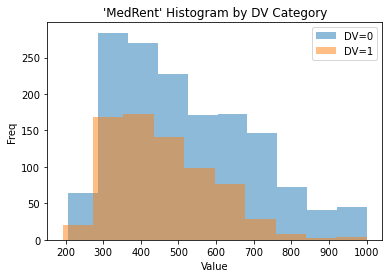

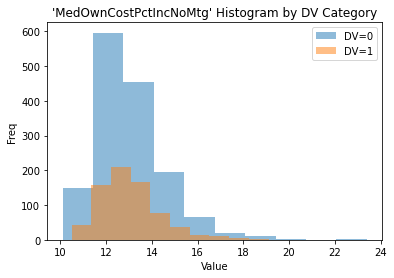

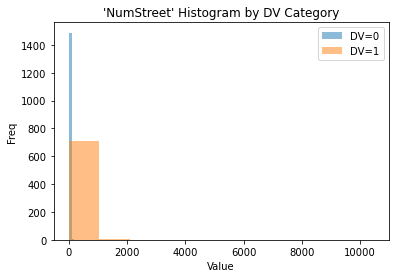

In [15]:
# histograms showing the distribution of features by the outcome variable (dependent variable)
def histo_plot_dv(x,y):
    plt.hist(list(x[y==0]), alpha=0.5, label='DV=0')
    plt.hist(list(x[y==1]), alpha=0.5, label='DV=1')
    plt.title("'{var_name}' Histogram by DV Category".format(var_name=x.name))
    plt.ylabel("Freq")
    plt.xlabel("Value")
    plt.legend(loc='upper right')
    plt.show()
    
# these show the distribution of a feature when the outcome is 0, so crime is less than .../none
histo_plot_dv(x['population'], y)
histo_plot_dv(x['racepctblack'], y)
histo_plot_dv(x['numbUrban'], y)
histo_plot_dv(x['medIncome'], y)
histo_plot_dv(x['pctWWage'], y)
histo_plot_dv(x['pctWInvInc'], y)
histo_plot_dv(x['medFamInc'], y)
histo_plot_dv(x['whitePerCap'], y)
histo_plot_dv(x['PctEmploy'], y)
histo_plot_dv(x['MalePctDivorce'], y)
histo_plot_dv(x['MalePctNevMarr'], y)
histo_plot_dv(x['TotalPctDiv'], y)
histo_plot_dv(x['PctKids2Par'], y)
histo_plot_dv(x['PctWorkMom'], y)
histo_plot_dv(x['NumImmig'], y)
histo_plot_dv(x['PctRecImmig8'], y)
histo_plot_dv(x['PctRecImmig10'], y)
histo_plot_dv(x['PctLargHouseOccup'], y)
histo_plot_dv(x['PersPerRentOccHous'], y)
histo_plot_dv(x['PctPersOwnOccup'], y)
histo_plot_dv(x['PctPersDenseHous'], y)
histo_plot_dv(x['HousVacant'], y)
histo_plot_dv(x['PctHousOwnOcc'], y)
histo_plot_dv(x['OwnOccLowQuart'], y)
histo_plot_dv(x['OwnOccMedVal'], y)
histo_plot_dv(x['RentLowQ'], y)
histo_plot_dv(x['RentMedian'], y)
histo_plot_dv(x['MedRent'], y)
histo_plot_dv(x['MedOwnCostPctIncNoMtg'], y)
histo_plot_dv(x['NumStreet'], y)

**Feature Engineering- 
Either 1. increase the dimensionality or 2. decrease the dimentionality

Increasing Dimensionality = creating new features. This is useful if the impact of two or more features on the outcome is non-additive. A good automated way to do this is to look for interactions between features.
e.g. a simple 2-way interaction (where X3 is the interaction between X1 and X2):

X3-X1 * X2

However, with lots of features, this grows the data A LOT. Therefore, it is better t use domain knowledge about certain interactions between features so that there aren't too many interaction terms.

Dimensionality has benefits because information is added, however, it is computationally costly i.e. inefficient and also has the potential for overfitting the model. So it is a trade off between creating new useful information vs the potential for overfitting plus the computational cost.

In [12]:
# polynomialFeatures in sklearn.preprocessing to create two-way interactions for ALL features
# not implemented because it would make the program too computationally slow 
# from itertools import combinations
# from sklearn.preprocessing import PolynomialFeatures

# def add_interactions(df):
    # get feature names
    #combos = list(combinations(list(df.columns),2))
   # colnames = list(df.columns) + ['_'.join(x) for x in combos]

    # establish the interactions in the data
   # poly = PolynomialFeatures(interaction_only=True, include_bias=False)
   # df = poly.fit_transform(df)
   # df = pd.DataFrame(df)
   # df.columns = colnames

    # remove the interactions with 0 values
    #noint_indicies = [i for i, x in enumerate(list((df == 0).all())) if x]
   # df = df.drop(df.columns[noint_indicies], axis=1)

   # return df


#x = add_interactions(x)
#print(x.head(5))

**Decreasing dimensionality**

Using principal component analysis(PCA), a method that transforms a dataset with many features into its principle components that best summarise the underlying variance in the data.

Each ‘principle component’ is established by finding the linear combination of features that maximises variance, whilst also ensuring zero correlation with previously calculated principal components.

PCA/ decreasing dimensionality is useful when you have very high-dimensionality data, in order to reduce dimensions, when the dataset has many highly correlated variables because it will take the variance from these to reduce this correlation and when there is poor observation-to-feature ratio.

However, using dimensionality reduction makes the data harder to interpret and understand because the output gives arbitrary principle components, e.g. for interpreting the outcome, principle component number 1 is not as easy to interpret as medIncome. Therefore, in certain contexts, like explaining the results to a client, this would make it difficult to explain the drivers of the target outcome variable.

In [13]:
# not implementing this either, because it makes the results too difficult to interpret
# Using sklearn.decomposition PCA to find the principal components 
# from sklearn.decomposition import PCA

# transform entire data set into 10 features
# pca = PCA(n_components=10)
# x_pca = pd.DataFrame(pca.fit_transform(x))

# print(x_pca.head(5))

**End of pre-processing